# Lab #3

First and Last Name: Muhammad Waseem

Student ID: 501038529

Question 1: What are the different metrics used to evaluate the performance of different clustering algorithms?

Silhouette score, DBI, ARI.

Question 2: Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?

We can use the confusion matrix, which visualizes the performance of clustering algorithms by comparing predicted clusters to actual labels.

Q1: New clusters:
Cluster 0: [[2 5]
 [1 2]]
Cluster 1: [[8 4]
 [7 5]
 [6 4]]
Cluster 2: [[ 2 10]
 [ 5  8]
 [ 4  9]]

Q2: New cluster centers:
[[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]


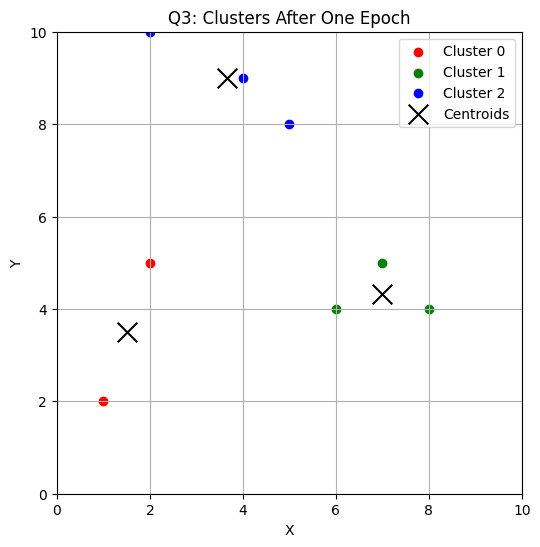


Q4: Number of iterations needed to converge: 2


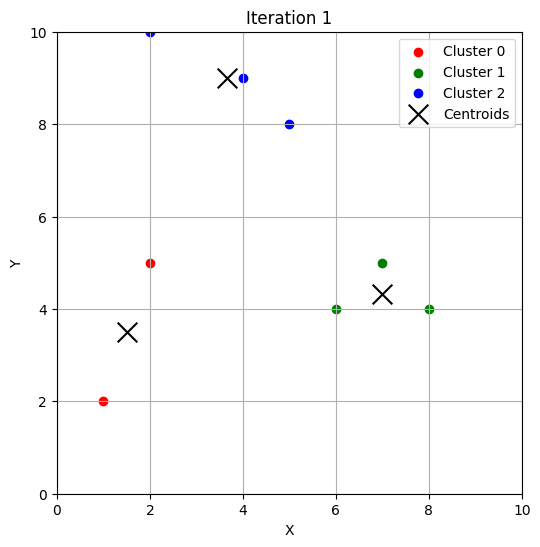

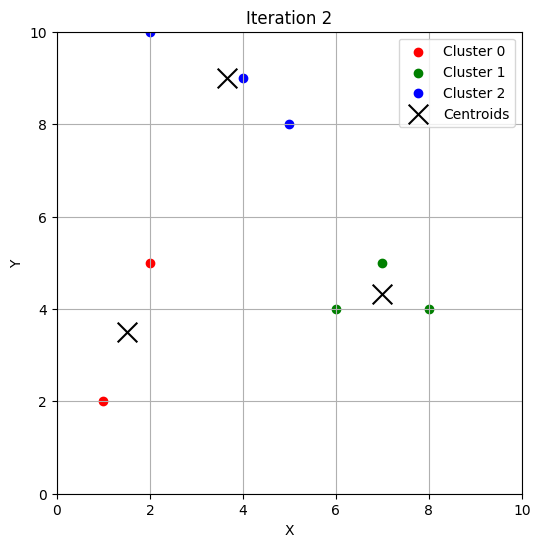

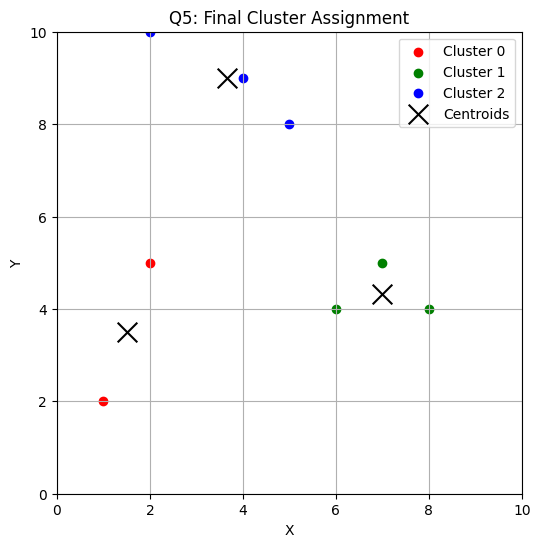

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Dataset 1: Points A1 to A8
points = np.array([
    [2, 10], # A1
    [2, 5],  # A2 (Initial centroid)
    [8, 4],  # A3 (Initial centroid)
    [5, 8],  # A4
    [7, 5],  # A5
    [6, 4],  # A6
    [1, 2],  # A7
    [4, 9]   # A8 (Initial centroid)
])

# Initial centroids
initial_centroids = np.array([points[1], points[2], points[7]])

def k_means_clustering(points, centroids, max_iters=10):
    clusters = None
    for i in range(max_iters):
        # Compute distances and assign clusters
        distances = cdist(points, centroids)
        clusters = np.argmin(distances, axis=1)

        # Compute new centroids
        new_centroids = np.array([points[clusters == j].mean(axis=0) for j in range(len(centroids))])

        # If centroids do not change, we have converged
        if np.all(centroids == new_centroids):
            return clusters, centroids, i+1

        centroids = new_centroids

    return clusters, centroids, max_iters

# Run k-means for one epoch
clusters, new_centroids, _ = k_means_clustering(points, initial_centroids, max_iters=1)
print("Q1: New clusters:")
for i in range(3):
    print(f"Cluster {i}: {points[clusters == i]}")

print("\nQ2: New cluster centers:")
print(new_centroids)

# Plot the clusters after one iteration
def plot_clusters(points, clusters, centroids, title):
    plt.figure(figsize=(6,6))
    colors = ['r', 'g', 'b']
    for i in range(3):
        plt.scatter(points[clusters == i][:, 0], points[clusters == i][:, 1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', s=200, label='Centroids')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.legend()
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid()
    plt.show()

plot_clusters(points, clusters, new_centroids, "Q3: Clusters After One Epoch")

# Determine convergence
clusters, final_centroids, epochs_needed = k_means_clustering(points, initial_centroids)
print(f"\nQ4: Number of iterations needed to converge: {epochs_needed}")

# Run and plot until convergence
def plot_epochs(points, initial_centroids):
    centroids = initial_centroids.copy()
    for i in range(epochs_needed):
        clusters, centroids, _ = k_means_clustering(points, centroids, max_iters=1)
        plot_clusters(points, clusters, centroids, f"Iteration {i+1}")

plot_epochs(points, initial_centroids)

# Final cluster plot
plot_clusters(points, clusters, final_centroids, "Q5: Final Cluster Assignment")


Q6: Accuracy = 0.70


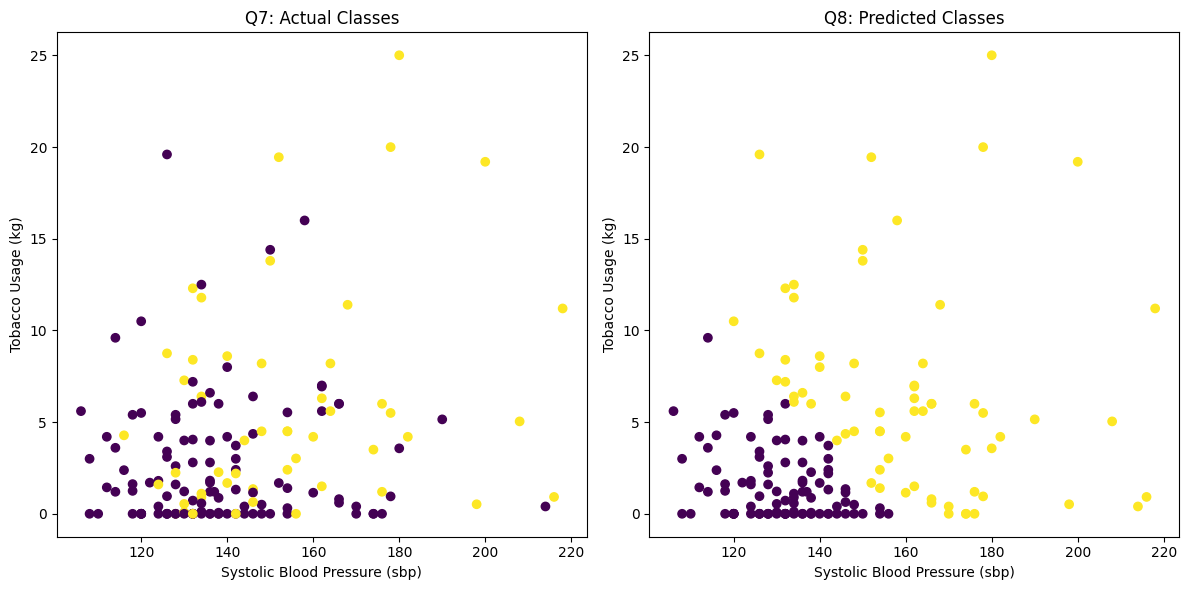

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv(url)

# Extract relevant features and labels
features = data[['sbp', 'tobacco']]
labels = data['chd']

# Split into training and testing sets
train_features = features.iloc[:300]
train_labels = labels.iloc[:300]
test_features = features.iloc[300:]
test_labels = labels.iloc[300:]

# Standardize the features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(train_features_scaled)

# Predict clusters for test data
test_clusters = kmeans.predict(test_features_scaled)

# Map clusters to class labels based on majority class in each cluster
cluster_labels = np.zeros_like(test_clusters)
for i in range(2):
    mask = (kmeans.labels_ == i)
    cluster_labels[i] = np.bincount(train_labels[mask]).argmax()

# Map predicted clusters to actual class labels
predicted_labels = cluster_labels[test_clusters]

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Q6: Accuracy = {accuracy:.2f}')

# Plot actual data points
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(test_features['sbp'], test_features['tobacco'], c=test_labels, cmap='viridis', marker='o')
plt.title('Q7: Actual Classes')
plt.xlabel('Systolic Blood Pressure (sbp)')
plt.ylabel('Tobacco Usage (kg)')

# Plot predicted data points
plt.subplot(1, 2, 2)
plt.scatter(test_features['sbp'], test_features['tobacco'], c=predicted_labels, cmap='viridis', marker='o')
plt.title('Q8: Predicted Classes')
plt.xlabel('Systolic Blood Pressure (sbp)')
plt.ylabel('Tobacco Usage (kg)')

plt.tight_layout()
plt.show()



Q9: NN Clusters
Cluster 0: [[ 2 10]
 [ 5  8]
 [ 4  9]]
Cluster 1: [[2 5]
 [1 2]]
Cluster 2: [[8 4]
 [7 5]
 [6 4]]


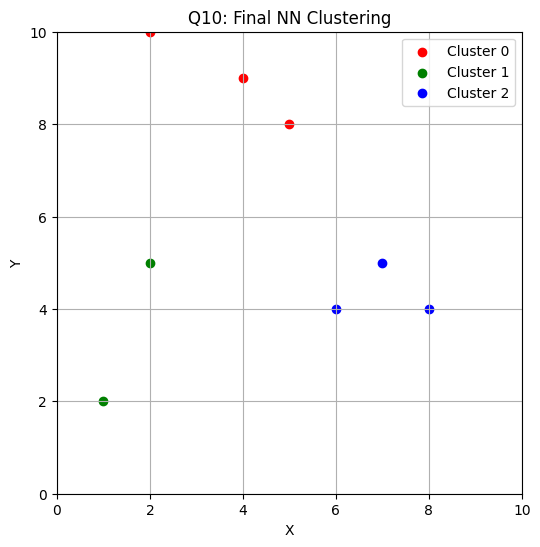


Q11: Comparison of K-Means vs Nearest Neighbor Clustering
- K-Means works well with larger datasets but struggles with non-globular clusters.
- NN clustering is more flexible in detecting arbitrary shapes but is computationally expensive.
- K-Means requires specifying k, whereas NN clustering depends on distance threshold.
- On large datasets, K-Means scales better, but NN clustering is more precise in detecting close groups.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Dataset 1: Points A1 to A8
points = np.array([
    [2, 10], # A1
    [2, 5],  # A2 (Initial centroid)
    [8, 4],  # A3 (Initial centroid)
    [5, 8],  # A4
    [7, 5],  # A5
    [6, 4],  # A6
    [1, 2],  # A7
    [4, 9]   # A8 (Initial centroid)
])

# Initial centroids
initial_centroids = np.array([points[1], points[2], points[7]])

def k_means_clustering(points, centroids, max_iters=10):
    clusters = None
    for i in range(max_iters):
        distances = cdist(points, centroids)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([points[clusters == j].mean(axis=0) for j in range(len(centroids))])
        if np.all(centroids == new_centroids):
            return clusters, centroids, i+1
        centroids = new_centroids
    return clusters, centroids, max_iters

clusters, new_centroids, _ = k_means_clustering(points, initial_centroids, max_iters=1)

# Part B: Nearest Neighbor Clustering with Threshold = 4
def nearest_neighbor_clustering(points, threshold):
    clusters = []
    for point in points:
        assigned = False
        for cluster in clusters:
            if np.linalg.norm(point - cluster[0]) <= threshold:
                cluster.append(point)
                assigned = True
                break
        if not assigned:
            clusters.append([point])
    return clusters

nn_clusters = nearest_neighbor_clustering(points, threshold=4)
print("\nQ9: NN Clusters")
for i, cluster in enumerate(nn_clusters):
    print(f"Cluster {i}: {np.array(cluster)}")

def plot_nn_clusters(nn_clusters, title):
    plt.figure(figsize=(6,6))
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i, cluster in enumerate(nn_clusters):
        cluster_points = np.array(cluster)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i % len(colors)], label=f'Cluster {i}')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.legend()
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid()
    plt.show()

plot_nn_clusters(nn_clusters, "Q10: Final NN Clustering")

# Q11: Comparison of K-Means and NN Clustering
print("\nQ11: Comparison of K-Means vs Nearest Neighbor Clustering")
print("- K-Means works well with larger datasets but struggles with non-globular clusters.")
print("- NN clustering is more flexible in detecting arbitrary shapes but is computationally expensive.")
print("- K-Means requires specifying k, whereas NN clustering depends on distance threshold.")
print("- On large datasets, K-Means scales better, but NN clustering is more precise in detecting close groups.")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Dataset 1: Points A1 to A8
points = np.array([
    [2, 10], # A1
    [2, 5],  # A2 (Initial centroid)
    [8, 4],  # A3 (Initial centroid)
    [5, 8],  # A4
    [7, 5],  # A5
    [6, 4],  # A6
    [1, 2],  # A7
    [4, 9]   # A8 (Initial centroid)
])

# Initial centroids
initial_centroids = np.array([points[1], points[2], points[7]])

def k_means_clustering(points, centroids, max_iters=10):
    clusters = None
    for i in range(max_iters):
        distances = cdist(points, centroids)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([points[clusters == j].mean(axis=0) for j in range(len(centroids))])
        if np.all(centroids == new_centroids):
            return clusters, centroids, i+1
        centroids = new_centroids
    return clusters, centroids, max_iters

def nearest_neighbor_clustering(points, threshold):
    clusters = []
    for point in points:
        assigned = False
        for cluster in clusters:
            if np.linalg.norm(point - cluster[0]) <= threshold:
                cluster.append(point)
                assigned = True
                break
        if not assigned:
            clusters.append([point])
    return clusters

# Q12: NN Clustering for Dataset 2
# Load dataset 2
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv(url)

# Extract relevant features and labels
features = data[['sbp', 'tobacco']]
labels = data['chd']

# Split into training and testing sets
train_features = features.iloc[:300]
train_labels = labels.iloc[:300]
test_features = features.iloc[300:]
test_labels = labels.iloc[300:]

# Standardize the features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Perform Nearest Neighbor Clustering with Threshold = 1.5 (assumption-based threshold)
def nearest_neighbor_classification(train_features, train_labels, test_features, threshold=1.5):
    test_predictions = []
    for test_point in test_features:
        min_dist = float('inf')
        predicted_label = None
        for i, train_point in enumerate(train_features):
            dist = np.linalg.norm(test_point - train_point)
            if dist < min_dist and dist <= threshold:
                min_dist = dist
                predicted_label = train_labels.iloc[i]
        test_predictions.append(predicted_label if predicted_label is not None else 0)  # Default to 0 if no close point
    return np.array(test_predictions)

# Predict test labels using NN clustering
predicted_labels = nearest_neighbor_classification(train_features_scaled, train_labels, test_features_scaled)

# Calculate accuracy
accuracy = np.mean(predicted_labels == test_labels)
print(f'Q12: Accuracy = {accuracy:.2f}')

Q12: Accuracy = 0.55


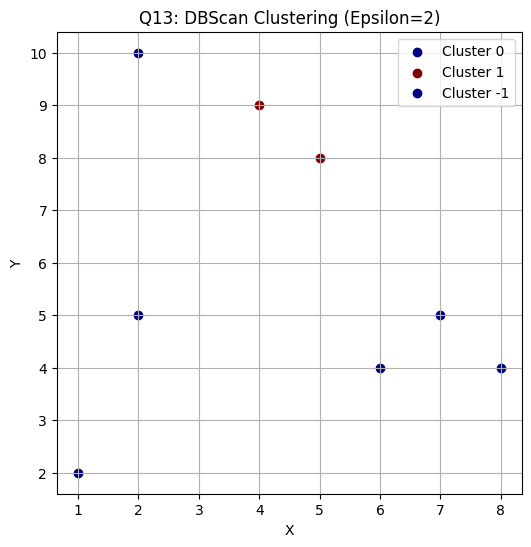

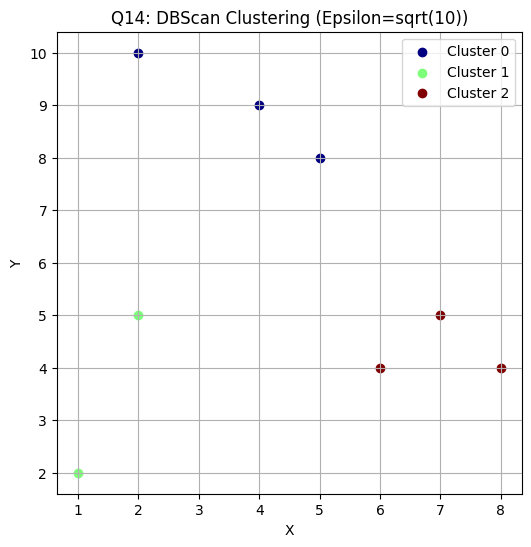

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Dataset 1: Points A1 to A8
points = np.array([
    [2, 10], # A1
    [2, 5],  # A2 (Initial centroid)
    [8, 4],  # A3 (Initial centroid)
    [5, 8],  # A4
    [7, 5],  # A5
    [6, 4],  # A6
    [1, 2],  # A7
    [4, 9]   # A8 (Initial centroid)
])

# Initial centroids
initial_centroids = np.array([points[1], points[2], points[7]])

def k_means_clustering(points, centroids, max_iters=10):
    clusters = None
    for i in range(max_iters):
        distances = cdist(points, centroids)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([points[clusters == j].mean(axis=0) for j in range(len(centroids))])
        if np.all(centroids == new_centroids):
            return clusters, centroids, i+1
        centroids = new_centroids
    return clusters, centroids, max_iters

def nearest_neighbor_clustering(points, threshold):
    clusters = []
    for point in points:
        assigned = False
        for cluster in clusters:
            if np.linalg.norm(point - cluster[0]) <= threshold:
                cluster.append(point)
                assigned = True
                break
        if not assigned:
            clusters.append([point])
    return clusters

# Q12: NN Clustering for Dataset 2
# Load dataset 2
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv(url)

# Extract relevant features and labels
features = data[['sbp', 'tobacco']]
labels = data['chd']

# Split into training and testing sets
train_features = features.iloc[:300]
train_labels = labels.iloc[:300]
test_features = features.iloc[300:]
test_labels = labels.iloc[300:]

# Standardize the features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Perform Nearest Neighbor Clustering with Threshold = 1.5 (assumption-based threshold)
def nearest_neighbor_classification(train_features, train_labels, test_features, threshold=1.5):
    test_predictions = []
    for test_point in test_features:
        min_dist = float('inf')
        predicted_label = None
        for i, train_point in enumerate(train_features):
            dist = np.linalg.norm(test_point - train_point)
            if dist < min_dist and dist <= threshold:
                min_dist = dist
                predicted_label = train_labels.iloc[i]
        test_predictions.append(predicted_label if predicted_label is not None else 0)  # Default to 0 if no close point
    return np.array(test_predictions)

# Predict test labels using NN clustering
predicted_labels = nearest_neighbor_classification(train_features_scaled, train_labels, test_features_scaled)

# Q13: Perform DBScan with epsilon = 2, min_samples = 2
dbscan_2 = DBSCAN(eps=2, min_samples=2, metric='euclidean')
dbscan_labels_2 = dbscan_2.fit_predict(points)

def plot_dbscan_clusters(points, labels, title):
    plt.figure(figsize=(6,6))
    unique_labels = set(labels)
    colors = [plt.cm.jet(float(i) / max(unique_labels)) for i in unique_labels]

    for k, col in zip(unique_labels, colors):
        class_members = (labels == k)
        plt.scatter(points[class_members, 0], points[class_members, 1], color=col, label=f'Cluster {k}')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_dbscan_clusters(points, dbscan_labels_2, "Q13: DBScan Clustering (Epsilon=2)")

# Q14: Perform DBScan with epsilon = sqrt(10), min_samples = 2
dbscan_sqrt10 = DBSCAN(eps=np.sqrt(10), min_samples=2, metric='euclidean')
dbscan_labels_sqrt10 = dbscan_sqrt10.fit_predict(points)

plot_dbscan_clusters(points, dbscan_labels_sqrt10, "Q14: DBScan Clustering (Epsilon=sqrt(10))")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Dataset 1: Points A1 to A8
points = np.array([
    [2, 10], # A1
    [2, 5],  # A2 (Initial centroid)
    [8, 4],  # A3 (Initial centroid)
    [5, 8],  # A4
    [7, 5],  # A5
    [6, 4],  # A6
    [1, 2],  # A7
    [4, 9]   # A8 (Initial centroid)
])

# Load dataset 2
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv(url)

# Extract relevant features and labels
features = data[['sbp', 'tobacco']]
labels = data['chd']

# Split into training and testing sets
train_features = features.iloc[:300]
train_labels = labels.iloc[:300]
test_features = features.iloc[300:]
test_labels = labels.iloc[300:]

# Standardize the features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Perform DBScan Clustering on Dataset 2
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(train_features_scaled)
train_clusters = dbscan.labels_

def assign_cluster_labels(train_clusters, train_labels):
    cluster_map = {}
    for cluster in np.unique(train_clusters):
        if cluster == -1:
            continue  # Ignore noise points
        cluster_labels = train_labels[train_clusters == cluster]
        if len(cluster_labels) > 0:
            cluster_map[cluster] = cluster_labels.mode()[0]
    return cluster_map

# Map DBScan clusters to class labels
cluster_map = assign_cluster_labels(train_clusters, train_labels)
test_clusters = dbscan.fit_predict(test_features_scaled)
predicted_labels = np.array([cluster_map.get(c, 0) for c in test_clusters])

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Q15: Accuracy of DBScan on Dataset 2 = {accuracy:.2f}')

# Performance Comparison
print("\nComparison of K-Means, NN, and DBScan:")
print("- K-Means: Works well on globular clusters, sensitive to initial centroids.")
print("- Nearest Neighbor: Flexible but computationally expensive on large datasets.")
print("- DBScan: Detects arbitrary-shaped clusters, robust to noise, but sensitive to epsilon value.")
print("- On Dataset 1: K-Means and NN were effective, DBScan was sensitive to epsilon.")
print("- On Dataset 2: DBScan handled noisy data well, K-Means was limited by fixed k.")


Q15: Accuracy of DBScan on Dataset 2 = 0.69

Comparison of K-Means, NN, and DBScan:
- K-Means: Works well on globular clusters, sensitive to initial centroids.
- Nearest Neighbor: Flexible but computationally expensive on large datasets.
- DBScan: Detects arbitrary-shaped clusters, robust to noise, but sensitive to epsilon value.
- On Dataset 1: K-Means and NN were effective, DBScan was sensitive to epsilon.
- On Dataset 2: DBScan handled noisy data well, K-Means was limited by fixed k.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Dataset 1: Points A1 to A8
points = np.array([
    [2, 10], # A1
    [2, 5],  # A2 (Initial centroid)
    [8, 4],  # A3 (Initial centroid)
    [5, 8],  # A4
    [7, 5],  # A5
    [6, 4],  # A6
    [1, 2],  # A7
    [4, 9]   # A8 (Initial centroid)
])

# Load dataset 2
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv(url)

# Extract relevant features and labels
features = data[['sbp', 'tobacco']]
labels = data['chd']

# Split into training and testing sets
train_features = features.iloc[:300]
train_labels = labels.iloc[:300]
test_features = features.iloc[300:]
test_labels = labels.iloc[300:]

# Standardize the features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(train_features_scaled)
kmeans_labels = kmeans.predict(test_features_scaled)
kmeans_accuracy = accuracy_score(test_labels, kmeans_labels)

# Perform Nearest Neighbor Classification
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features_scaled, train_labels)
nn_labels = knn.predict(test_features_scaled)
nn_accuracy = accuracy_score(test_labels, nn_labels)

# Perform DBScan Clustering on Dataset 2
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(train_features_scaled)
train_clusters = dbscan.labels_

def assign_cluster_labels(train_clusters, train_labels):
    cluster_map = {}
    for cluster in np.unique(train_clusters):
        if cluster == -1:
            continue  # Ignore noise points
        cluster_labels = train_labels[train_clusters == cluster]
        if len(cluster_labels) > 0:
            cluster_map[cluster] = cluster_labels.mode()[0]
    return cluster_map

# Map DBScan clusters to class labels
cluster_map = assign_cluster_labels(train_clusters, train_labels)
test_clusters = dbscan.fit_predict(test_features_scaled)
predicted_labels = np.array([cluster_map.get(c, 0) for c in test_clusters])

# Calculate DBScan accuracy
dbscan_accuracy = accuracy_score(test_labels, predicted_labels)

# Print accuracy results
print(f'Q16: Accuracy Comparison:')
print(f'- K-Means Accuracy: {kmeans_accuracy:.2f}')
print(f'- Nearest Neighbor Accuracy: {nn_accuracy:.2f}')
print(f'- DBScan Accuracy: {dbscan_accuracy:.2f}')

# Observations and Comparisons
print("\nObservations:")
print("K-Means has the highest accuracy, followed by DBScan, and then a distant gap placing Nearest Neighbours accuracy in last place.")


Q16: Accuracy Comparison:
- K-Means Accuracy: 0.70
- Nearest Neighbor Accuracy: 0.64
- DBScan Accuracy: 0.69

Observations:
K-Means has the highest accuracy, followed by DBScan, and then a distant gap placing Nearest Neighbours accuracy in last place.
